# Matematikai Algoritmusok és Felfedezések I.

## 11. Előadás: Pandas

### 2023 május 17.

In [106]:
# grafikonokhoz
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# grafikonok stílusának beállítása
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# Adatok beolvasása egy csv fájlból


Szegedi időjárási adatokat gyűjtöttünk össze a `weather.csv` fálba

In [107]:
idojaras = pd.read_csv('weather.csv')

In [108]:
idojaras[:3]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


`pandas.read_csv(filepath_or_buffer, sep=<object object>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None, storage_options=None)`

Tipikus beállítások:

* `sep`: oszlop elválasztó karakter
* `encoding`: karater kódolás (tipikusan `'latin1'` vagy `'utf8'`)
* `index_col`: Az index legyen a megjelölt oszlop
* `parse_dates`: A megadott oszlopkat értelmezze idő adatként

In [109]:
idojaras = pd.read_csv('weather.csv', sep=',', encoding='latin1',index_col='Formatted Date')
idojaras[:3]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


## Adatok lekérdezése

Amikor beolvasunk egy CSV fájlt egy ` DataFrame` objektum jön létre, ami oszlopokból és sorokból áll. Egy oszlophoz hasonlóan férhetünk hozzá, mint egy dictionaryben egy elemhez.

In [74]:
idojaras.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [8]:
idojaras.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Egy oszlop egy `Series` objektumnak felel meg. 

In [75]:
idojaras['Temperature (C)']

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [76]:
type(idojaras['Temperature (C)'])

pandas.core.series.Series

Egy `DataFrame`-re érdemes úgy gondolni, mint olyan `Series`-ekből álló készlet, amiknek megegyezik az indexe.  

In [9]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [10]:
gravity=pd.Series([9.8,3.72,10.44 ],index=['Earth','Mars','Saturn'])
gravity

Earth      9.80
Mars       3.72
Saturn    10.44
dtype: float64

In [11]:
orbital_speed=pd.Series([29.78,24.007,9.68],index=['Earth','Mars','Saturn'])
orbital_speed

Earth     29.780
Mars      24.007
Saturn     9.680
dtype: float64

In [12]:
planet_data=pd.DataFrame({
     "orbital speed": orbital_speed,
     "gravity": gravity
 })
planet_data

,orbital speed,gravity
Earth,29.780,9.80
Mars,24.007,3.72
Saturn,9.680,10.44


A `loc` és `iloc` függvényekkel tudunk sorokat lekérdezni.

In [13]:
planet_data.loc['Earth'] #  név szerint

orbital speed    29.78
gravity           9.80
Name: Earth, dtype: float64

In [14]:
planet_data.iloc[1] # pozíció szerint

orbital speed    24.007
gravity           3.720
Name: Mars, dtype: float64

Sorokat a szokásos tömb indexeléssel is tudunk lekérdezni. Például az első nap adatait `idojaras[:24]`-ként kapjuk.

In [15]:
idojaras[:24] 
#idojaras.iloc[:24]


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.


## Grafikon készítés

Egyszerűen `.plot()`-ot rakunk a végére.

<AxesSubplot:>

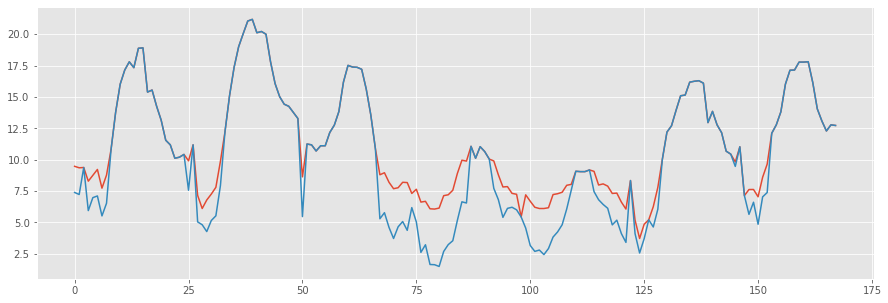

In [81]:
idojaras['Temperature (C)'][:7*24].plot() 
idojaras['Apparent Temperature (C)'][:7*24].plot()

## Egymásik példa

20000 sakjátszmát és a hozzájuk tartozó adatokat tartalmazó adatbázis.

In [82]:
chess = pd.read_csv('chess.csv')

Ha kiíratunk egy `DataFrame`-et csak néhány sort mutat

In [85]:
chess.tail(3)


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3


In [19]:
chess['opening_name']

0              Slav Defense: Exchange Variation
1        Nimzowitsch Defense: Kennedy Variation
2         King's Pawn Game: Leonardis Variation
3        Queen's Pawn Game: Zukertort Variation
4                              Philidor Defense
                          ...                  
20053                             Dutch Defense
20054                              Queen's Pawn
20055           Queen's Pawn Game: Mason Attack
20056                              Pirc Defense
20057           Queen's Pawn Game: Mason Attack
Name: opening_name, Length: 20058, dtype: object

In [27]:
chess[:3]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


A két módszert kombinálhatjuk, tetszőleges sorrendben:

In [86]:
chess['opening_name'][:5]

0          Slav Defense: Exchange Variation
1    Nimzowitsch Defense: Kennedy Variation
2     King's Pawn Game: Leonardis Variation
3    Queen's Pawn Game: Zukertort Variation
4                          Philidor Defense
Name: opening_name, dtype: object

In [87]:
chess[:5]['opening_name']

0          Slav Defense: Exchange Variation
1    Nimzowitsch Defense: Kennedy Variation
2     King's Pawn Game: Leonardis Variation
3    Queen's Pawn Game: Zukertort Variation
4                          Philidor Defense
Name: opening_name, dtype: object

## Több oszlop

In [22]:
chess[['winner', 'white_id','black_id']]

,winner,white_id,black_id
0,white,bourgris,a-00
1,black,a-00,skinnerua
2,white,ischia,a-00
3,white,daniamurashov,adivanov2009
4,white,nik221107,adivanov2009
...,...,...,...
20053,white,belcolt,jamboger
20054,black,jamboger,farrukhasomiddinov
20055,white,jamboger,schaaksmurf3
20056,white,marcodisogno,jamboger


## Melyik a leggyakoribb megnyitás?

A `.value_counts()` metódust használhatjuk:

In [88]:
chess['opening_name'].value_counts()

Van't Kruijs Opening                                              368
Sicilian Defense                                                  358
Sicilian Defense: Bowdler Attack                                  296
Scotch Game                                                       271
French Defense: Knight Variation                                  271
                                                                 ... 
Sicilian Defense: Kupreichik Variation                              1
Modern Defense: Lizard Defense |  Mittenberger Gambit               1
French Defense: Rubinstein Variation |  Kasparov Attack             1
French Defense: Tarrasch Variation |  Open System |  Main Line      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation        1
Name: opening_name, Length: 1477, dtype: int64

In [89]:
chess_opening_count= chess['opening_name'].value_counts()
chess_opening_count[:10] 

Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: opening_name, dtype: int64

Sőt grafikont is könnyen tudunk rajzolni!

<AxesSubplot:ylabel='opening_name'>

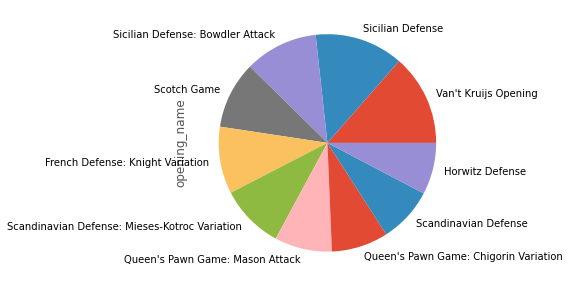

In [90]:

chess_opening_count[:10].plot(kind='pie')

## Adatok szűrése

Melyik mecccseken játszották a szicíliai megnyitást? (`'Sicilian Defense'`)

In [91]:
sicilian = chess[chess['opening_name'] == "Sicilian Defense"]
sicilian[:3]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
32,FSkgvV2E,True,1.502780e+12,1.502780e+12,54,resign,white,10+10,vihaandumir,1203,shivangithegenius,1019,e4 c5 Nf3 d5 exd5 Qxd5 Nc3 Qe6+ Qe2 Qxe2+ Bxe2...,B27,Sicilian Defense,3
167,BoDJGVyk,True,1.503450e+12,1.503450e+12,107,resign,white,10+10,jadesummer,1885,isachess,1856,e4 c5 Nf3 d6 Nc3 a6 a3 Nf6 Bc4 e6 d3 Nc6 Ba2 B...,B50,Sicilian Defense,4
174,0dm3RaQv,True,1.503120e+12,1.503120e+12,105,outoftime,white,10+0,fikr,1895,isachess,1859,e4 c5 Nf3 d6 Bc4 Nf6 d3 a6 a3 g6 b4 Bg7 Bb2 O-...,B50,Sicilian Defense,4


Mit történik a háttérben?

In [92]:
chess['opening_name'] == "Sicilian Defense"

0        False
1        False
2        False
3        False
4        False
         ...  
20053    False
20054    False
20055    False
20056    False
20057    False
Name: opening_name, Length: 20058, dtype: bool

A háttérben a Numpyból ismert indexelési trükkök működnek!

Például össze éselhetünk feltételeket:

In [94]:
is_sicilian = chess['opening_name'] == "Sicilian Defense"
is_white_win = chess['winner'] == "white"
chess[is_sicilian & is_white_win][:5]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
32,FSkgvV2E,True,1.502780e+12,1.502780e+12,54,resign,white,10+10,vihaandumir,1203,shivangithegenius,1019,e4 c5 Nf3 d5 exd5 Qxd5 Nc3 Qe6+ Qe2 Qxe2+ Bxe2...,B27,Sicilian Defense,3
167,BoDJGVyk,True,1.503450e+12,1.503450e+12,107,resign,white,10+10,jadesummer,1885,isachess,1856,e4 c5 Nf3 d6 Nc3 a6 a3 Nf6 Bc4 e6 d3 Nc6 Ba2 B...,B50,Sicilian Defense,4
174,0dm3RaQv,True,1.503120e+12,1.503120e+12,105,outoftime,white,10+0,fikr,1895,isachess,1859,e4 c5 Nf3 d6 Bc4 Nf6 d3 a6 a3 g6 b4 Bg7 Bb2 O-...,B50,Sicilian Defense,4
270,PEIWrbTQ,True,1.471100e+12,1.471100e+12,29,mate,white,7+3,eideral,1513,atorius,1456,e4 c5 Nf3 d6 d4 Nc6 Bb5 a6 Bxc6+ bxc6 dxc5 Qa5...,B54,Sicilian Defense,5
612,YcFsnSyR,True,1.502390e+12,1.502400e+12,75,resign,white,10+0,alihasanzadeh,1211,snaek161616,1230,e4 c5 Bb5 Nf6 Nc3 Nc6 Bxc6 bxc6 e5 Nd5 Nxd5 cx...,B20,Sicilian Defense,2


Minden kombinálható:

In [96]:
chess[is_sicilian & is_white_win][['opening_name','turns','victory_status']][:5]

,opening_name,turns,victory_status
32,Sicilian Defense,54,resign
167,Sicilian Defense,107,resign
174,Sicilian Defense,105,outoftime
270,Sicilian Defense,29,mate
612,Sicilian Defense,75,resign


## Fehér vagy fekete figurákkal éri meg jobban játszani?

In [97]:
chess['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

A fehér győzelmek hogyan értek véget?

In [30]:
is_white_win= chess[chess['winner'] == "white"]
is_white_win['victory_status'].value_counts()

resign       5844
mate         3344
outoftime     813
Name: victory_status, dtype: int64

Adott játék vége típuson belül fehér győzelmek aránya?

In [31]:
is_white_win= chess[chess['winner'] == "white"]
white_win_victory_count=is_white_win['victory_status'].value_counts()
all_games_victory_counts=chess['victory_status'].value_counts()

In [32]:
white_win_victory_count / all_games_victory_counts

draw              NaN
mate         0.528696
outoftime    0.483929
resign       0.524267
Name: victory_status, dtype: float64

<AxesSubplot:>

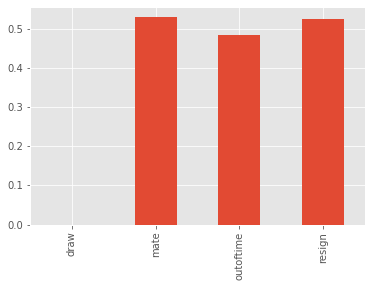

In [33]:
(white_win_victory_count / all_games_victory_counts).plot(kind='bar')

## A DataFrame megváltoztatása

Mennyi a két játékos közötti pontszámkülönbség?

In [98]:
chess[:3]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [35]:
chess['Difference']=chess['white_rating']-chess['black_rating']

In [36]:
chess[:3]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,Difference
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4


Itt valami gond van:

<AxesSubplot:>

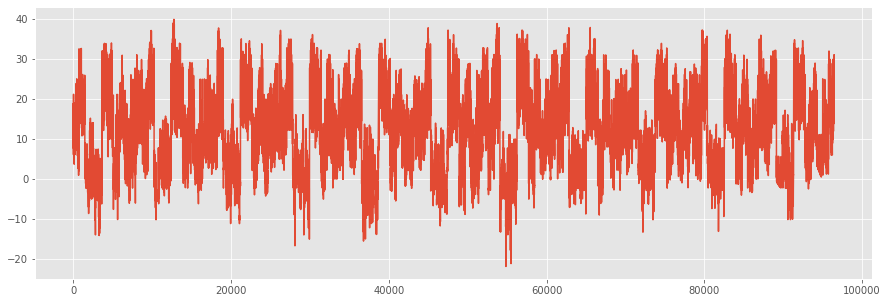

In [105]:
idojaras['Temperature (C)'].plot()

In [104]:
idojaras

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Szedjük szét az időpontokat két oszlopba.

In [102]:
idojaras['Summary'].str.split(" ") 

0        [Partly, Cloudy]
1        [Partly, Cloudy]
2        [Mostly, Cloudy]
3        [Partly, Cloudy]
4        [Mostly, Cloudy]
               ...       
96448    [Partly, Cloudy]
96449    [Partly, Cloudy]
96450    [Partly, Cloudy]
96451    [Partly, Cloudy]
96452    [Partly, Cloudy]
Name: Summary, Length: 96453, dtype: object

In [114]:
idojaras['Date'] = idojaras.index.str.split(" ").str[0]
idojaras['Hour']=idojaras.index.str.split(" ").str[1].str.split(":").str[0]


In [53]:
idojaras

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Hour
Formatted Date,,,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,00
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,01
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,02
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,03
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09,19
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09,20
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09,21


<AxesSubplot:xlabel='Formatted Date'>

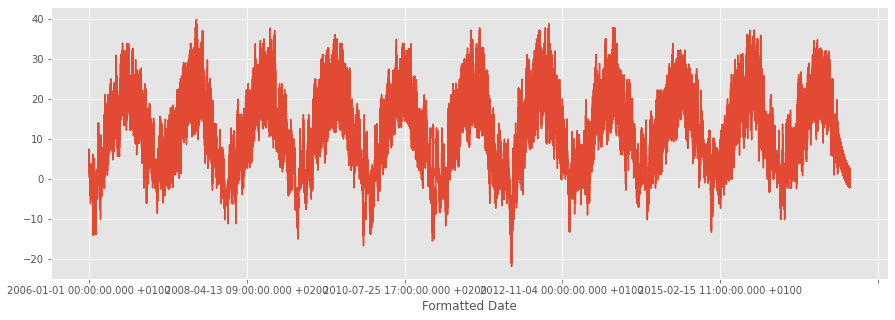

In [115]:
idojaras.sort_values(by=['Date','Hour'])['Temperature (C)'].plot()

<AxesSubplot:xlabel='Formatted Date'>

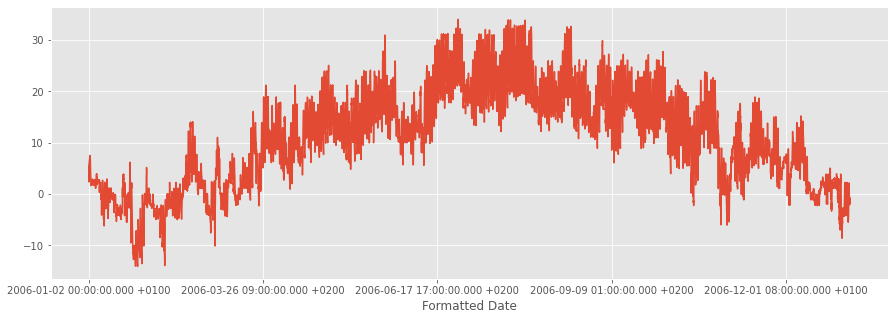

In [116]:
idojaras[(idojaras['Date'] > '2006-01-01') & (idojaras['Date'] <= '2006-12-31')].sort_values(by=['Date','Hour'])['Temperature (C)'].plot()

## Aggregálás

Mennyi az adott megnyitást játszók átlagpontszáma?

In [38]:
chess[:3]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,Difference
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,-4


A `groupby()` függvényt használhajuk:

In [46]:
chess[['white_rating','black_rating','opening_name']].groupby('opening_name').mean().sort_values(by=['white_rating'])

,white_rating,black_rating
opening_name,,
Ponziani Opening: Romanishin Variation,998.0,1016.0
King's Pawn Opening: Speers,1032.0,1140.0
King's Gambit Accepted,1064.0,1174.0
English Opening: Achilles-Omega Gambit,1093.5,1211.5
Ruy Lopez: Morphy Defense | Arkhangelsk Variation,1103.0,1283.0
...,...,...
English Opening: Anglo-Indian Defense | Old Indian Formation,2454.0,1848.0
Gruenfeld Defense: Botvinnik Variation,2485.0,1802.0
Tarrasch Defense: Classical Variation | Carlsbad Variation,2586.0,1618.0


Több aggregálás egyszerre elvégezhető:

In [117]:
stats=chess[['white_rating','opening_name','black_rating']].groupby('opening_name')
.agg(['mean', 'count']).sort_values(by=[('white_rating','mean')])

In [118]:
stats

white_rating        \
                                                           mean count   
opening_name                                                            
Ponziani Opening: Romanishin Variation                    998.0     1   
King's Pawn Opening: Speers                              1032.0     1   
King's Gambit Accepted                                   1064.0     1   
English Opening: Achilles-Omega Gambit                   1093.5     2   
Ruy Lopez: Morphy Defense |  Arkhangelsk Variation       1103.0     1   
...                                                         ...   ...   
English Opening: Anglo-Indian Defense |  Old In...       2454.0     1   
Gruenfeld Defense: Botvinnik Variation                   2485.0     1   
Tarrasch Defense: Classical Variation |  Carlsb...       2586.0     1   
Queen's Gambit Declined: Westphalian Variation           2619.0     2   
Russian Game: Modern Attack |  Murrey Variation          2621.0     1   

                                                   black_rating        
                                                           mean count  
opening_name                                                           
Ponziani Opening: Romanishin Variation                   1016.0     1  
King's Pawn Opening: Speers                              1140.0     1  
King's Gambit Accepted                                   1174.0     1  
English Opening: Achilles-Omega Gambit                   1211.5     2  
Ruy Lopez: Morphy Defense |  Arkhangelsk Variation       1283.0     1  
...                                                         ...   ...  
English Opening: Anglo-Indian Defense |  Old In...       1848.0     1  
Gruenfeld Defense: Botvinnik Variation                   1802.0     1  
Tarrasch Defense: Classical Variation |  Carlsb...       1618.0     1  
Queen's Gambit Declined: Westphalian Variation           1927.0     2  
Russian Game: Modern Attack |  Murrey Variation          1613.0     1  

[1477 rows x 4 columns]

In [60]:
stats[stats[('white_rating','count')]>10].sort_values(by=[('white_rating','mean')]) 

white_rating        \
                                                           mean count   
opening_name                                                            
Van Geet Opening: Reversed Nimzowitsch              1216.000000    11   
Zukertort Opening: Reversed Mexican Defense         1240.294118    17   
Center Game                                         1293.307692    13   
Ware Opening                                        1322.333333    24   
Alekhine Defense: Mokele Mbembe                     1332.250000    12   
...                                                         ...   ...   
Ruy Lopez: Morphy Defense |  Anderssen Variation    1885.047619    21   
Slav Defense: Quiet Variation |  Pin Defense        1900.769231    13   
Sicilian Defense: Grand Prix Attack                 1913.466667    15   
Ruy Lopez: Morphy Defense |  Classical Defense ...  1916.153846    13   
King's Indian Attack: Symmetrical Defense           1955.500000    12   

                                                   black_rating        
                                                           mean count  
opening_name                                                           
Van Geet Opening: Reversed Nimzowitsch              1275.545455    11  
Zukertort Opening: Reversed Mexican Defense         1429.411765    17  
Center Game                                         1351.384615    13  
Ware Opening                                        1369.791667    24  
Alekhine Defense: Mokele Mbembe                     1217.250000    12  
...                                                         ...   ...  
Ruy Lopez: Morphy Defense |  Anderssen Variation    1799.666667    21  
Slav Defense: Quiet Variation |  Pin Defense        1801.230769    13  
Sicilian Defense: Grand Prix Attack                 1872.733333    15  
Ruy Lopez: Morphy Defense |  Classical Defense ...  1795.538462    13  
King's Indian Attack: Symmetrical Defense           1862.500000    12  

[375 rows x 4 columns]

## String műveletek

In [119]:
chess['moves'].str.startswith('e4')

0        False
1        False
2         True
3        False
4         True
         ...  
20053    False
20054    False
20055    False
20056     True
20057    False
Name: moves, Length: 20058, dtype: bool

In [120]:
chess['first_move']=chess['moves'].str.split(' ').str[0] 

In [121]:
chess['first_move'
]

0        d4
1        d4
2        e4
3        d4
4        e4
         ..
20053    d4
20054    d4
20055    d4
20056    e4
20057    d4
Name: first_move, Length: 20058, dtype: object

Győzelmek száma első lépések szerint?

In [124]:
chess[['first_move','winner']].groupby('first_move').agg('count').sort_values(by="winner").tail()

,winner
first_move,
e3,416
c4,716
Nf3,725
d4,4522
e4,12598


Ez nem jó! Miért?

Fehér győzelmek száma 

In [125]:
chess.groupby('first_move')['winner'].apply(lambda ser: ser.str.contains("white").sum()).nlargest(10)

first_move
e4     6371
d4     2258
c4      383
Nf3     373
e3      142
g3       85
b3       82
f4       68
d3       50
b4       48
Name: winner, dtype: int64

In [126]:
chess.groupby('first_move')['winner'].apply(lambda ser: ser.str.contains("white").sum()/ser.str.contains("white").count()).nlargest(10)

first_move
a3     0.629630
Nh3    0.600000
c3     0.553571
b4     0.545455
c4     0.534916
Nf3    0.514483
e4     0.505715
h3     0.500000
d4     0.499337
b3     0.473988
Name: winner, dtype: float64

## Idő alapú adatok

In [61]:
idojaras 

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.


In [127]:
idojaras.index=idojaras.index.str[:19]
idojaras.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Hour
Formatted Date,,,,,,,,,,,,,
2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,00
2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,01
2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,02
2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,03
2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,04


### Átalakítás a Pandas idő formátumává

In [128]:
idojaras.index = pd.to_datetime(idojaras.index, format='%Y-%m-%d %H:%M:%S')

In [129]:
idojaras.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Hour
Formatted Date,,,,,,,,,,,,,
2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,00
2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,01
2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,02
2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,03
2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,04


In [130]:
idojaras.index

DatetimeIndex(['2006-04-01 00:00:00', '2006-04-01 01:00:00',
               '2006-04-01 02:00:00', '2006-04-01 03:00:00',
               '2006-04-01 04:00:00', '2006-04-01 05:00:00',
               '2006-04-01 06:00:00', '2006-04-01 07:00:00',
               '2006-04-01 08:00:00', '2006-04-01 09:00:00',
               ...
               '2016-09-09 14:00:00', '2016-09-09 15:00:00',
               '2016-09-09 16:00:00', '2016-09-09 17:00:00',
               '2016-09-09 18:00:00', '2016-09-09 19:00:00',
               '2016-09-09 20:00:00', '2016-09-09 21:00:00',
               '2016-09-09 22:00:00', '2016-09-09 23:00:00'],
              dtype='datetime64[ns]', name='Formatted Date', length=96453, freq=None)

Vegyük csak a 2006, 2007, 2008 évek adatait. 

In [131]:
ido_2016_2018=idojaras[(idojaras.index > '2006-01-01') & (idojaras.index <= '2008-12-31')].sort_index()
ido_2016_2018 

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Hour
Formatted Date,,,,,,,,,,,,,
2006-01-01 01:00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.,2006-01-01,01
2006-01-01 02:00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.,2006-01-01,02
2006-01-01 03:00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.,2006-01-01,03
2006-01-01 04:00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.,2006-01-01,04
2006-01-01 05:00:00,Mostly Cloudy,rain,1.205556,-3.072222,0.85,15.9068,149.0,9.9820,0.0,1014.08,Mostly cloudy throughout the day.,2006-01-01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-30 20:00:00,Overcast,snow,-6.038889,-6.038889,0.88,4.7334,212.0,4.0733,0.0,1042.91,Overcast throughout the day.,2008-12-30,20
2008-12-30 21:00:00,Overcast,snow,-5.533333,-5.533333,0.82,3.1234,244.0,4.0733,0.0,1042.80,Overcast throughout the day.,2008-12-30,21
2008-12-30 22:00:00,Overcast,snow,-6.077778,-6.077778,0.85,3.3810,314.0,6.2951,0.0,1042.57,Overcast throughout the day.,2008-12-30,22


### `Resample()`

<AxesSubplot:xlabel='Formatted Date'>

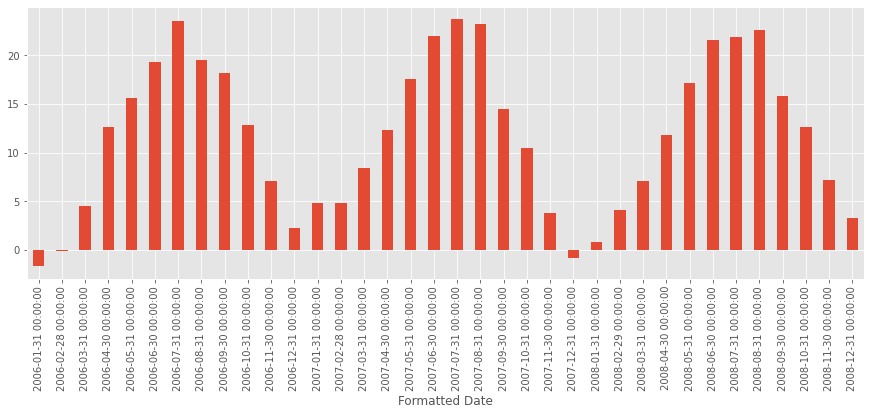

In [132]:
ido_2016_2018['Temperature (C)'].resample('M').apply(np.mean).plot(kind='bar')

Három havonta vett minimum, maximum és átlag.

In [133]:
ido_2016_2018.resample('3M').agg(['min','max', 'mean'])['Temperature (C)']

,min,max,mean
Formatted Date,,,
2006-01-31,-14.088889,7.505556,-1.677314
2006-04-30,-13.927778,25.044444,5.816305
2006-07-31,4.816667,34.005556,19.526449
2006-10-31,-5.994444,32.638889,16.826113
2007-01-31,-8.594444,18.883333,4.717391
2007-04-30,-4.183333,25.094444,8.633461
2007-07-31,1.361111,39.905556,21.060213
2007-10-31,-2.777778,37.127778,16.099004
2008-01-31,-11.127778,13.794444,1.265879


In [134]:
is_foggy=ido_2016_2018['Daily Summary'].str.contains('Fog')
ido_2016_2018[is_foggy].head()


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Hour
Formatted Date,,,,,,,,,,,,,
2006-01-05 00:00:00,Overcast,rain,1.666667,-2.738889,0.92,17.3880,30.0,9.9015,0.0,1023.10,Foggy in the morning.,2006-01-05,00
2006-01-05 01:00:00,Foggy,rain,2.633333,2.633333,0.96,2.6887,325.0,2.4794,0.0,1020.86,Foggy in the morning.,2006-01-05,01
2006-01-05 02:00:00,Overcast,rain,1.688889,-3.161111,0.92,20.5275,30.0,6.1985,0.0,1022.27,Foggy in the morning.,2006-01-05,02
2006-01-05 03:00:00,Overcast,rain,1.161111,-2.222222,0.95,11.3022,41.0,4.2021,0.0,1022.13,Foggy in the morning.,2006-01-05,03
2006-01-05 04:00:00,Overcast,rain,1.216667,-2.083333,0.96,10.9802,31.0,4.0572,0.0,1021.80,Foggy in the morning.,2006-01-05,04


<AxesSubplot:xlabel='Formatted Date'>

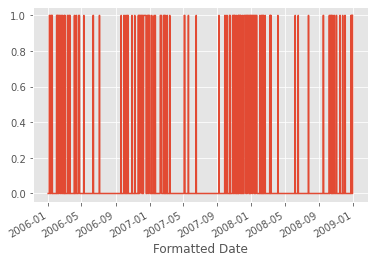

In [69]:
is_foggy=is_foggy.astype(float)
is_foggy.plot()

<AxesSubplot:xlabel='Formatted Date'>

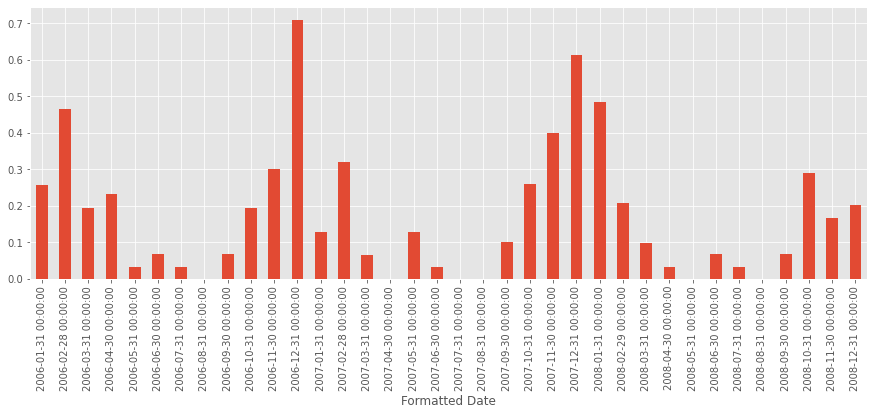

In [135]:
is_foggy.astype(float).resample('M').apply(np.mean).plot(kind='bar')